<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Quantum_Hardware_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install/upgrade Qiskit and IBM Runtime client
!pip install -q -U qiskit qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

In [3]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="6m4PQGwTduqxUndjDxLiSiEwajfzozw0xDOPrByiuOiT",  # Replace with your API key
    plans_preference=["open"],
    overwrite=True
)

print("API key saved successfully")


API key saved successfully


In [3]:
service = QiskitRuntimeService(plans_preference=["open"])
print("IBM Quantum service initialized")

qiskit_runtime_service.__init__:WARNING:2026-01-22 19:16:27,584: Instance was not set at service instantiation. Based on the following filters: (tags: None, region: us-east, eu-de, plans_preference: open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


IBM Quantum service initialized


In [6]:
available_backends = service.backends()
print("Available backends:")
for b in available_backends:
    print("-", b.name)


qiskit_runtime_service.backends:WARNING:2026-01-22 19:17:13,643: Loading instance: open-instance, plan: open


Available backends:
- ibm_fez
- ibm_marrakesh
- ibm_torino


In [7]:
backend = service.backend("ibm_fez")  # Pick the simulator name from Step 5
print("Using backend:", backend.name)


qiskit_runtime_service.backends:WARNING:2026-01-22 19:18:57,013: Using instance: open-instance, plan: open


Using backend: ibm_fez


In [8]:
real_backends = service.backends(simulator=False, operational=True)
backend = min(real_backends, key=lambda b: b.status().pending_jobs)
print("Using REAL backend:", backend.name, "Queue:", backend.status().pending_jobs)


qiskit_runtime_service.backends:WARNING:2026-01-22 19:19:24,033: Loading instance: open-instance, plan: open


Using REAL backend: ibm_torino Queue: 0


In [9]:
qc = QuantumCircuit(1, 1)
qc.h(0)       # Hadamard gate → creates superposition
qc.measure(0, 0)  # Measure the qubit
qc.draw()


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [10]:
t_qc = transpile(qc, backend)
t_qc.draw()


global phase: π/4
          ┌─────────┐┌────┐┌─────────┐┌─┐
q_0 -> 18 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├
          └─────────┘└────┘└─────────┘└╥┘
     c: 1/═════════════════════════════╩═
                                       0

In [11]:
sampler = Sampler(mode=backend)
job = sampler.run([t_qc], shots=1024)
print("Job ID:", job.job_id())


Job ID: d5p7h51h2mqc739dsaf0


In [12]:
result = job.result()
counts = result[0].data.c.get_counts()
print("Measurement results:", counts)


Measurement results: {'0': 512, '1': 512}


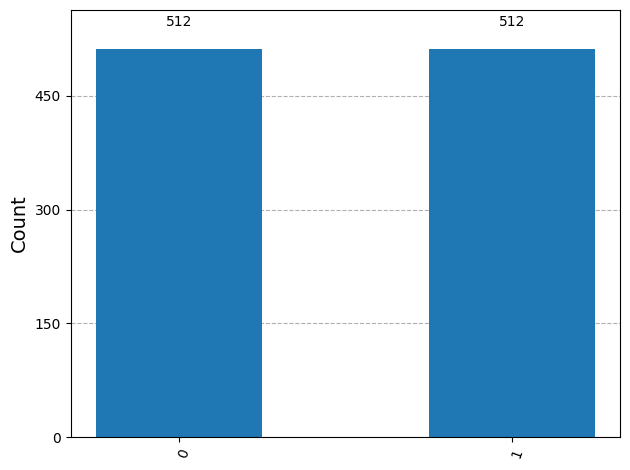

In [15]:
plot_histogram(counts)
